In [1]:
#import os
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

In [2]:
melhousing = Path("melb_data1.csv")

In [3]:
melhousing_df=pd.read_csv(melhousing)
melhousing_df.head()

Suburb           Address  Rooms Type    Price Method SellerG      Date  \
0  Abbotsford      85 Turner St      2    h  1480000      S  Biggin  03/12/16   
1  Abbotsford   25 Bloomburg St      2    h  1035000      S  Biggin  4/2/2016   
2  Abbotsford      5 Charles St      3    h  1465000     SP  Biggin  4/3/2017   
3  Abbotsford  40 Federation La      3    h   850000     PI  Biggin  04/03/17   
4  Abbotsford       55a Park St      4    h  1600000     VB  Nelson  4/6/2016   

   Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
0       2.5      3067  ...         1  1.0       202           NaN        NaN   
1       2.5      3067  ...         1  0.0       156          79.0     1900.0   
2       2.5      3067  ...         2  0.0       134         150.0     1900.0   
3       2.5      3067  ...         2  1.0        94           NaN        NaN   
4       2.5      3067  ...         1  2.0       120         142.0     2014.0   

   CouncilArea Lattitude  Longtitude             Regionname Propertycount  
0        Yarra  -37.7996    144.9984  Northern Metropolitan          4019  
1        Yarra  -37.8079    144.9934  Northern Metropolitan          4019  
2        Yarra  -37.8093    144.9944  Northern Metropolitan          4019  
3        Yarra  -37.7969    144.9969  Northern Metropolitan          4019  
4        Yarra  -37.8072    144.9941  Northern Metropolitan          4019  

[5 rows x 21 columns]

In [4]:
melhousing_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13518
Landsize         13580
BuildingArea      7130
YearBuilt         8205
CouncilArea      12211
Lattitude        13580
Longtitude       13580
Regionname       13580
Propertycount    13580
dtype: int64

In [5]:
melhousingclean_df=melhousing_df.drop(["BuildingArea","YearBuilt"],axis=1)
melhousingclean_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13518
Landsize         13580
CouncilArea      12211
Lattitude        13580
Longtitude       13580
Regionname       13580
Propertycount    13580
dtype: int64

In [6]:
#melhousingclean_df["CouncilArea"]= melhousingclean_df["CouncilArea"].fillna(method="ffill")
melhousingclean_df["CouncilArea"] = melhousingclean_df["CouncilArea"].ffill()

In [7]:
melhousingclean_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13518
Landsize         13580
CouncilArea      13580
Lattitude        13580
Longtitude       13580
Regionname       13580
Propertycount    13580
dtype: int64

In [8]:
#melhousingclean_df['Date'] = pd.to_datetime(melhousingclean_df['Date'], dayfirst=True)
#melhousingclean_df['Date'] = pd.to_datetime(melhousingclean_df['Date'], format='%d/%m/%Y', dayfirst=True)
#print(melhousingclean_df['Date'].dtype)

In [9]:
melhousingclean_df['Date'] = pd.to_datetime(melhousingclean_df['Date'])
melhousingclean_df['FormattedDate'] = melhousingclean_df['Date'] .dt.strftime('%m/%d/%Y')
print(melhousingclean_df['FormattedDate'])
melhousingclean_df.head()

0        03/12/2016
1        04/02/2016
2        04/03/2017
3        04/03/2017
4        04/06/2016
            ...    
13575    08/26/2017
13576    08/26/2017
13577    08/26/2017
13578    08/26/2017
13579    08/26/2017
Name: FormattedDate, Length: 13580, dtype: object


C:\Users\h\AppData\Local\Temp\ipykernel_4356\1378387369.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  melhousingclean_df['Date'] = pd.to_datetime(melhousingclean_df['Date'])


Suburb           Address  Rooms Type    Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000     VB  Nelson   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0 2016-03-12       2.5      3067         2         1  1.0       202   
1 2016-04-02       2.5      3067         2         1  0.0       156   
2 2017-04-03       2.5      3067         3         2  0.0       134   
3 2017-04-03       2.5      3067         3         2  1.0        94   
4 2016-04-06       2.5      3067         3         1  2.0       120   

  CouncilArea  Lattitude  Longtitude             Regionname  Propertycount  \
0       Yarra   -37.7996    144.9984  Northern Metropolitan           4019   
1       Yarra   -37.8079    144.9934  Northern Metropolitan           4019   
2       Yarra   -37.8093    144.9944  Northern Metropolitan           4019   
3       Yarra   -37.7969    144.9969  Northern Metropolitan           4019   
4       Yarra   -37.8072    144.9941  Northern Metropolitan           4019   

  FormattedDate  
0    03/12/2016  
1    04/02/2016  
2    04/03/2017  
3    04/03/2017  
4    04/06/2016

In [10]:
#melhousingclean_df.count()

In [11]:
melhousing_data = melhousingclean_df[(melhousingclean_df["Type"] == "h") & (melhousingclean_df["Rooms"] <= 2) & (melhousingclean_df["Bedroom2"] == 2) & (melhousingclean_df["Car"] == 1)][["Suburb", "Type", "Distance", "Rooms", "Bedroom2", "Bathroom", "Landsize", "Car", "Price"]]
melhousing_data.head()

Suburb Type  Distance  Rooms  Bedroom2  Bathroom  Landsize  Car  \
0   Abbotsford    h       2.5      2         2         1       202  1.0   
13  Abbotsford    h       2.5      2         2         1       195  1.0   
19  Abbotsford    h       2.5      2         2         1       150  1.0   
24  Abbotsford    h       2.5      2         2         2       124  1.0   
37  Abbotsford    h       2.5      2         2         1       172  1.0   

      Price  
0   1480000  
13  1172500  
19   890000  
24  1100000  
37  1030000

In [12]:
#Linear Regression between Type of House vs Price
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + " x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

The r-squared is: 0.10708291059975715


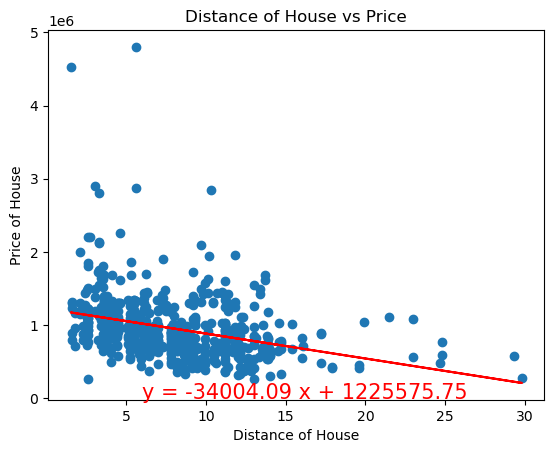

In [13]:
x_values = melhousing_data["Distance"]
y_values = melhousing_data["Price"]
plt.title("Distance of House vs Price")
plt.xlabel("Distance of House")
plt.ylabel("Price of House")
plot_linear_regression(x_values, y_values, "Distance of House vs Price", (6, 30))

In [14]:
melhousing_data1 = melhousingclean_df[(melhousingclean_df["Type"] == "u") & (melhousingclean_df["Rooms"] <= 2) & (melhousingclean_df["Bedroom2"] == 2) & (melhousingclean_df["Car"] == 1)][["Suburb", "Type", "Distance", "Rooms", "Bedroom2", "Bathroom", "Landsize", "Car", "Price"]]
melhousing_data1.head()

Suburb Type  Distance  Rooms  Bedroom2  Bathroom  Landsize  Car  \
10    Abbotsford    u       2.5      2         2         2         0  1.0   
12    Abbotsford    u       2.5      2         2         2         0  1.0   
23    Abbotsford    u       2.5      2         2         1         0  1.0   
44  Airport West    u      13.5      2         2         1       168  1.0   
49  Airport West    u      13.5      2         2         1       141  1.0   

     Price  
10  700000  
12  750000  
23  500000  
44  500000  
49  515000

The r-squared is: 0.026614816974144376


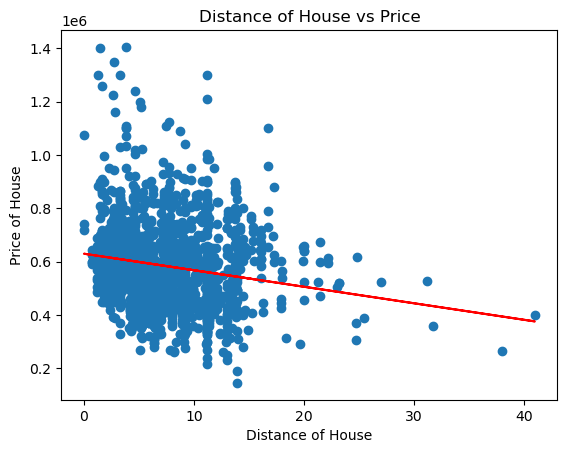

In [15]:
x_values = melhousing_data1["Distance"]
y_values = melhousing_data1["Price"]
plt.title("Distance of House vs Price")
plt.xlabel("Distance of House")
plt.ylabel("Price of House")
plot_linear_regression(x_values, y_values, "Distance of House vs Price", (6, 30))

In [16]:
melhousing_data2 = melhousingclean_df[(melhousingclean_df["Type"] == "h") & (melhousingclean_df["Rooms"] > 2) & (melhousingclean_df["Bedroom2"] >2) & (melhousingclean_df["Car"] == 1)][["Suburb", "Type", "Distance", "Rooms", "Bedroom2", "Bathroom", "Landsize", "Car", "Price"]]
melhousing_data2.head()

Suburb Type  Distance  Rooms  Bedroom2  Bathroom  Landsize  Car  \
3   Abbotsford    h       2.5      3         3         2        94  1.0   
16  Abbotsford    h       2.5      3         3         2       113  1.0   
27  Abbotsford    h       2.5      3         3         3       166  1.0   
30  Abbotsford    h       2.5      4         4         3         0  1.0   
32  Abbotsford    h       2.5      3         3         1       168  1.0   

      Price  
3    850000  
16  1200000  
27  1447500  
30  1542000  
32  1290000

The r-squared is: 0.19834004935978328


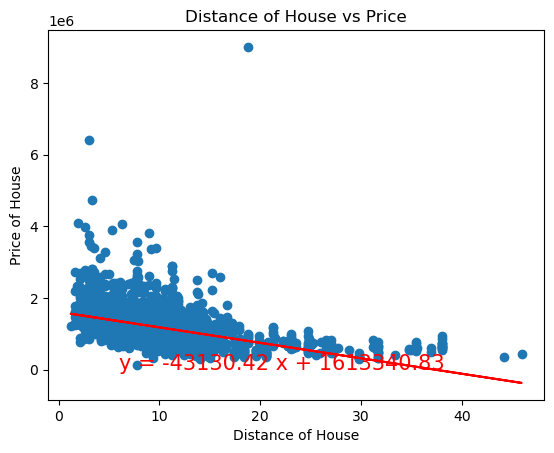

In [17]:
x_values = melhousing_data2["Distance"]
y_values = melhousing_data2["Price"]
plt.title("Distance of House vs Price")
plt.xlabel("Distance of House")
plt.ylabel("Price of House")
plot_linear_regression(x_values, y_values, "Distance of House vs Price", (6, 30))

In [18]:
melhousing_data3 = melhousingclean_df[(melhousingclean_df["Type"] == "u") & (melhousingclean_df["Rooms"] > 2) & (melhousingclean_df["Bedroom2"] >2) & (melhousingclean_df["Car"] == 1)][["Suburb", "Type", "Distance", "Rooms", "Bedroom2", "Bathroom", "Landsize", "Car", "Price"]]
melhousing_data3.tail()

Suburb Type  Distance  Rooms  Bedroom2  Bathroom  Landsize  \
12430          Albion    u      10.5      3         3         1       284   
12434      Ascot Vale    u       4.3      3         3         2      3215   
12718  Essendon North    u       8.2      3         3         2       292   
12853    Surrey Hills    u      10.2      3         3         2       270   
13164         Donvale    u      16.1      3         3         2       294   

       Car    Price  
12430  1.0   675000  
12434  1.0   870000  
12718  1.0  1170000  
12853  1.0  1290000  
13164  1.0   775000

The r-squared is: 0.19274936553861424


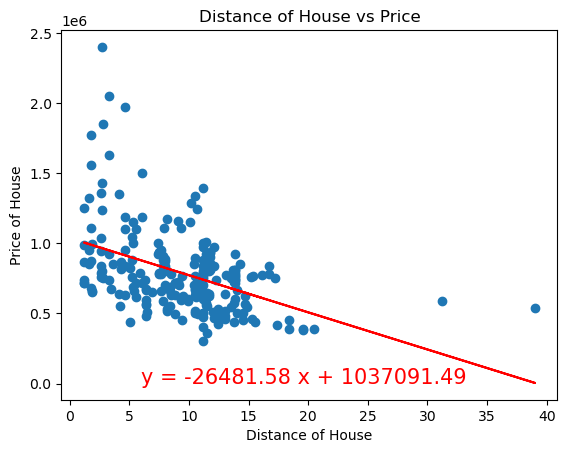

In [19]:
x_values = melhousing_data3["Distance"]
y_values = melhousing_data3["Price"]
plt.title("Distance of House vs Price")
plt.xlabel("Distance of House")
plt.ylabel("Price of House")
plot_linear_regression(x_values, y_values, "Distance of House vs Price", (6, 30))

In [20]:
melhousing_data3 = melhousingclean_df[(melhousingclean_df["Type"] == "h") & (melhousingclean_df["Car"] == 1)][["Suburb", "Type", "Distance", "Rooms", "Bedroom2", "Bathroom", "Landsize", "Car", "Price"]]
melhousing_data3.tail()

Suburb Type  Distance  Rooms  Bedroom2  Bathroom  Landsize  Car  \
13562    Thornbury    h       7.0      3         3         1       312  1.0   
13564  Tullamarine    h      12.9      3         3         1       607  1.0   
13572     Watsonia    h      14.5      2         2         1       210  1.0   
13573     Werribee    h      14.7      4         4         2       662  1.0   
13579   Yarraville    h       6.3      4         4         1       362  1.0   

         Price  
13562  1450000  
13564   540000  
13572   650000  
13573   635000  
13579  1285000

The r-squared is: 0.06556677819197264


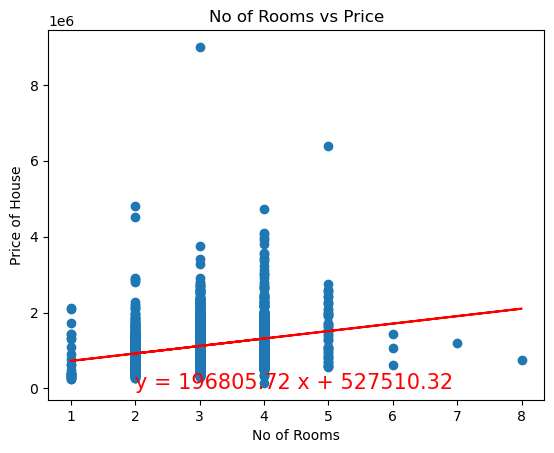

In [21]:
x_values = melhousing_data3["Rooms"]
y_values = melhousing_data3["Price"]
plt.title("No of Rooms vs Price")
plt.xlabel("No of Rooms")
plt.ylabel("Price of House")
plot_linear_regression(x_values, y_values, "No of Rooms vs Price", (2, 30))

In [22]:
melhousing_data4 = melhousingclean_df[(melhousingclean_df["Type"] == "u") & (melhousingclean_df["Car"] == 1)][["Suburb", "Type", "Distance", "Rooms", "Bedroom2", "Bathroom", "Landsize", "Car", "Price"]]
melhousing_data4.tail()

Suburb Type  Distance  Rooms  Bedroom2  Bathroom  Landsize  \
13449           Highett    u      16.0      2         2         1       158   
13453  Hoppers Crossing    u      18.4      2         2         1       150   
13482      Malvern East    u       8.4      2         2         1       129   
13495      Moonee Ponds    u       6.2      2         2         1      1475   
13510        Nunawading    u      15.4      2         2         1       903   

       Car   Price  
13449  1.0  680500  
13453  1.0  315000  
13482  1.0  651000  
13495  1.0  435000  
13510  1.0  710000

The r-squared is: 0.2923350562770316


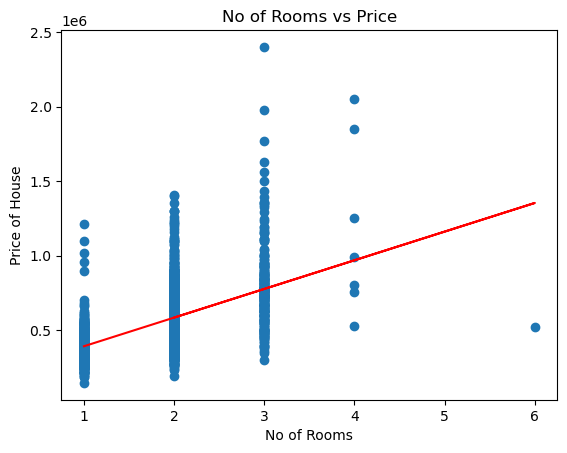

In [23]:
x_values = melhousing_data4["Rooms"]
y_values = melhousing_data4["Price"]
plt.title("No of Rooms vs Price")
plt.xlabel("No of Rooms")
plt.ylabel("Price of House")
plot_linear_regression(x_values, y_values, "No of Rooms vs Price", (3, 30))

In [24]:
melhousing_data5 = melhousingclean_df[(melhousingclean_df["Type"] == "h") & (melhousingclean_df["Car"] > 1)][["Suburb", "Type", "Distance", "Rooms", "Bedroom2", "Bathroom", "Landsize", "Car", "Price"]]
melhousing_data5.head()

Suburb Type  Distance  Rooms  Bedroom2  Bathroom  Landsize  Car  \
4   Abbotsford    h       2.5      4         3         1       120  2.0   
7   Abbotsford    h       2.5      2         2         1       256  2.0   
9   Abbotsford    h       2.5      2         3         1       220  2.0   
11  Abbotsford    h       2.5      3         3         2       214  2.0   
15  Abbotsford    h       2.5      2         2         1       238  2.0   

      Price  
4   1600000  
7   1636000  
9   1097000  
11  1350000  
15  1310000

The r-squared is: 0.11743329741418507


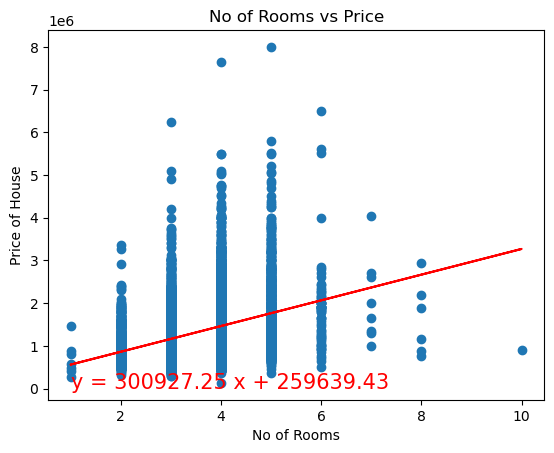

In [25]:
x_values = melhousing_data5["Rooms"]
y_values = melhousing_data5["Price"]
plt.title("No of Rooms vs Price")
plt.xlabel("No of Rooms")
plt.ylabel("Price of House")
plot_linear_regression(x_values, y_values, "No of Rooms vs Price", (1, 10))

In [26]:
melhousing_data6 = melhousingclean_df[(melhousingclean_df["Type"] == "u") & (melhousingclean_df["Car"] > 1)][["Suburb", "Type", "Distance", "Rooms", "Bedroom2", "Bathroom", "Landsize", "Car", "Price"]]
melhousing_data6.head()

Suburb Type  Distance  Rooms  Bedroom2  Bathroom  Landsize  Car  \
22   Abbotsford    u       2.5      3         3         2      4290  2.0   
147      Altona    u      13.8      3         2         1       311  2.0   
156      Altona    u      13.8      2         2         1       115  2.0   
157      Altona    u      13.8      3         3         2       230  2.0   
177      Altona    u      13.8      3         3         1       181  2.0   

       Price  
22   1090000  
147   630000  
156   425000  
157   605000  
177   605000

The r-squared is: 0.08951447296287965


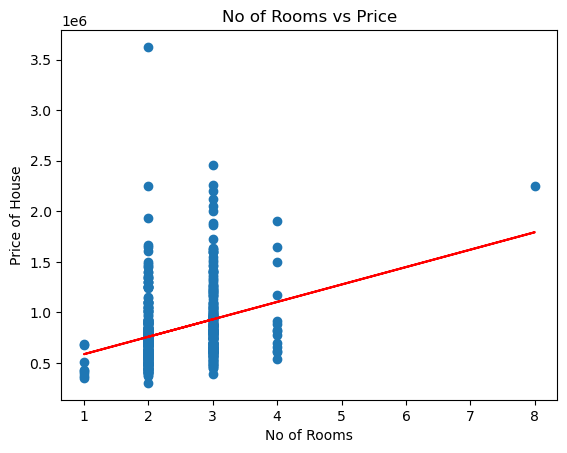

In [27]:
x_values = melhousing_data6["Rooms"]
y_values = melhousing_data6["Price"]
plt.title("No of Rooms vs Price")
plt.xlabel("No of Rooms")
plt.ylabel("Price of House")
plot_linear_regression(x_values, y_values, "No of Rooms vs Price", (1, 10))

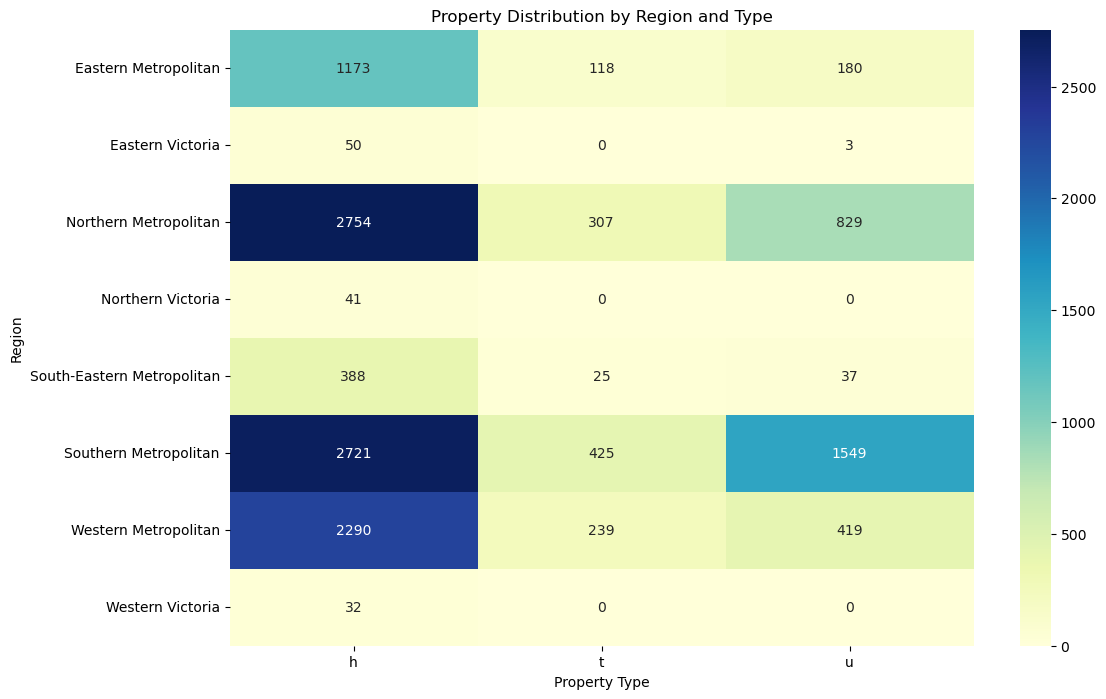

In [28]:
# Create a contingency table for RegionName vs. Type
region_type_heatmap_data = pd.crosstab(melhousingclean_df['Regionname'], melhousingclean_df['Type'])

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(region_type_heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title("Property Distribution by Region and Type")
plt.xlabel("Property Type")
plt.ylabel("Region")
plt.show()

In [ ]:
# Create a contingency table for LandSize vs Price
Lansize_Price_heatmap_data = pd.crosstab(melhousingclean_df['Landsize'], melhousingclean_df['Price'])

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(Lansize_Price_heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title("Landsize vs Price")
plt.xlabel("Land Size")
plt.ylabel("Price")
plt.show()

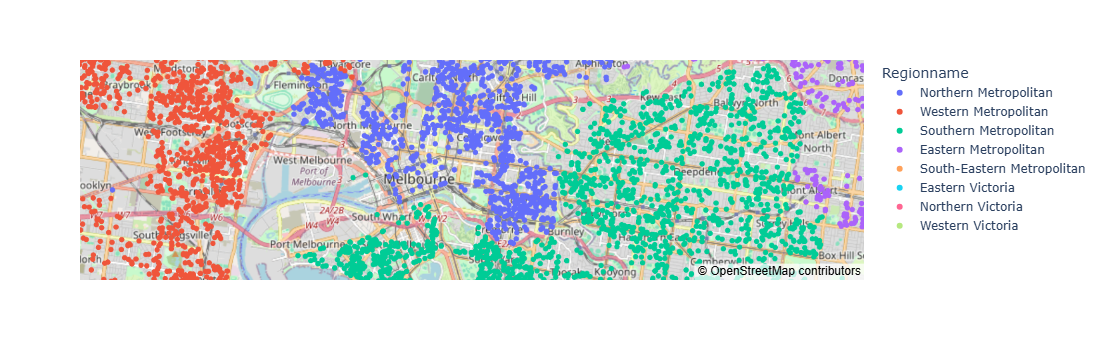

In [36]:
import plotly.express as px
fig = px.scatter_mapbox(melhousingclean_df,
                        lat="Lattitude",
                        lon="Longtitude",
                        color="Regionname",
                        zoom=10,
                        height=600)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

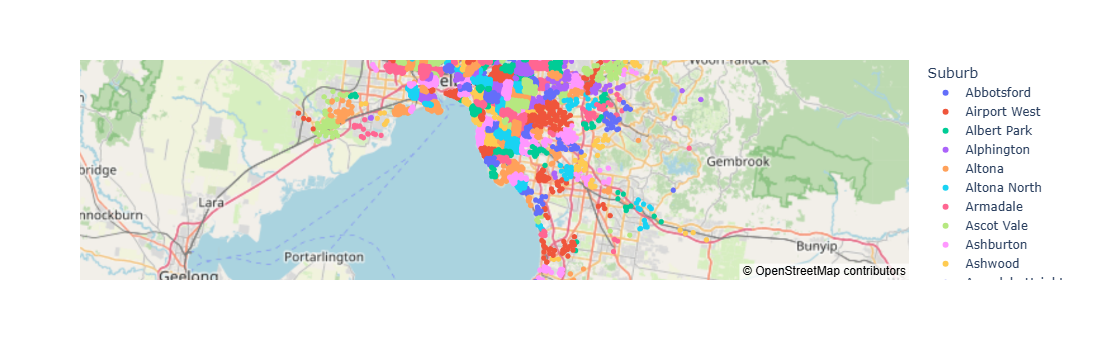

In [37]:
import plotly.express as px
fig = px.scatter_mapbox(melhousingclean_df,
                        lat="Lattitude",
                        lon="Longtitude",
                        color="Suburb",
                        zoom=10,
                        height=600)

fig.update_layout(mapbox_style="open-street-map")

fig.show()